In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trayectoria(x0, y0, vx0, vy0, t, dt, delta_R):
    #Se definen los parámetros que se van a actualizar conforme el tiempo como series de 0:
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    R = np.zeros(len(t))
    #Definimos los parámetros iniciales:
    x[0], y[0] = x0, y0
    vx, vy = vx0, vy0
    #Definimos la frecuencia ciclotrónica ideal:
    omega0 = 1.0
    for i in range(len(t)-1): #Barriendo en el tiempo
        R_ideal = np.sqrt(x[i]**2 + y[i]**2)
        omega = omega0 + (2*np.random.random() - 1)*delta_R #Definimos la perturbación en la frecuencia según lo puesto en la guía.
        #Actualizamos las aceleraciones y las velocidades:
        ax =  omega * vy
        ay = -omega * vx
        vx += ax * dt
        vy += ay * dt
        #La posición siguiente es la anterior más la trayectoria dada por las velocidades en esa posición:
        x[i+1] = x[i] + vx * dt
        y[i+1] = y[i] + vy * dt
        #Actualizamos R:
        R[i] = np.sqrt(x[i]**2 + y[i]**2)
    R[-1] = np.sqrt(x[-1]**2 + y[-1]**2)
    return x, y, R


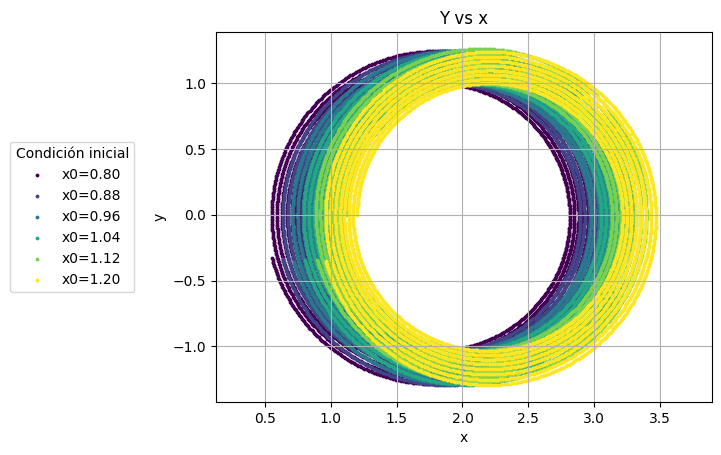

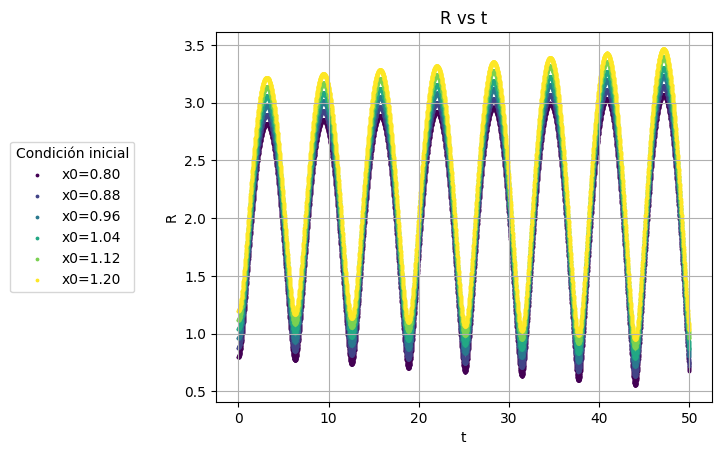

In [2]:
#Definimos la cantidad de intervalos de los arrays:
dt = 0.01
t = np.arange(0, 50, dt)
delta_R = 0.02
#Definimos los parámetros iniciales:
x0_vals = np.linspace(0.8, 1.2, 6)
y0 = 0
vx0 = 0
vy0 = 1
#Establecemos un gradiente de colores:
colores = plt.cm.viridis(np.linspace(0, 1, len(x0_vals)))

#Grafica 1 y vs x:
plt.figure()
for i, x0 in enumerate(x0_vals):
    x, y, R = trayectoria(x0, y0, vx0, vy0, t, dt, delta_R)
    plt.scatter(x, y, s=3, color=colores[i], label=f"x0={x0:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Y vs x")
plt.axis("equal")
plt.legend(title="Condición inicial",
           loc="center right",
           bbox_to_anchor=(-0.15, 0.5))
plt.grid(True)
plt.show()

#Grafica 2 R vs t:
plt.figure()
for i, x0 in enumerate(x0_vals):
    x, y, R = trayectoria(x0, y0, vx0, vy0, t, dt, delta_R)
    plt.scatter(t, R, s=3, color=colores[i], label=f"x0={x0:.2f}")
plt.xlabel("t")
plt.ylabel("R")
plt.title("R vs t")
plt.legend(title="Condición inicial",
           loc="center right",
           bbox_to_anchor=(-0.15, 0.5))
plt.grid(True)
plt.show()
